In [1]:
import matplotlib.pyplot as plt

In [2]:
from temmeta import data_io as dio

In [3]:
from pystem.stemsegmentation import segmentationSTEM
import time

## Load the dataset from the EMD file

In [4]:
f = dio.EMDFile("./example_dataset.emd")

In [5]:
f.print_simple_structure()

------------------------------
        Image datasets        
------------------------------
Dataset number: 0, UUID: 7c3929705ae04354b656fb2f929a1cfa, Shape: 4096x4096, Frames: 1, Data type: int16, Min:179, Max:1966



In [6]:
im = f.get_dataset("Image", "7c3929705ae04354b656fb2f929a1cfa")

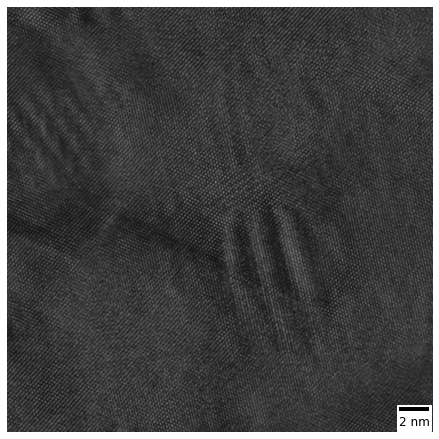

(<matplotlib.axes._axes.Axes at 0x7f62f56dcdd0>,
 <matplotlib.image.AxesImage at 0x7f62f56bf910>)

In [7]:
im.plot()

In [8]:
f.close()

## Do segmentation on the data

In [9]:
descriptor_name = 'local_correlation_map'
seg = segmentationSTEM(n_patterns=3,
                       window_x=20,window_y=20,
                       patch_x=20,patch_y=20,
                       step=5,
                       descriptor_name=descriptor_name,
                       #method='direct',
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(im.data)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

method: direct
time_cost: 334.71[s]


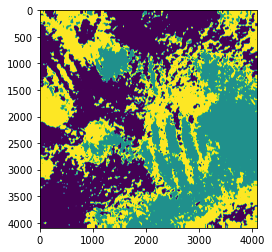

In [10]:
plt.imshow(labels)